In [79]:
# Imports
import json
import numpy as np
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [46]:
experiment_dir = "experiments/05M_24D-16H_04M_42S/experiment0_Q0.01_W0.005_D0.05_T0.001/"

In [47]:
# Load config.json
with open(experiment_dir + "config.json", "r") as f:
    config_dict = json.load(f)

In [48]:
parameters = ['diffusion_coefficient', 'queen_bee_concentration',
             'worker_bee_concentration', 'worker_bee_threshold']

In [49]:
D = config_dict['diffusion_coefficient']
Q = config_dict['swarm_parameters']['queen_bee_concentration']
W = config_dict['swarm_parameters']['worker_bee_concentration']
T = config_dict['swarm_parameters']['worker_bee_threshold']
values = [D, Q, W, T]

In [50]:
params = dict(zip([p for p in parameters], values))
params

{'diffusion_coefficient': 0.05,
 'queen_bee_concentration': 0.01,
 'worker_bee_concentration': 0.005,
 'worker_bee_threshold': 0.001}

In [72]:
# Load measurements.json
with open(experiment_dir + "data/measurements.json", "r") as f:
    measurements = json.load(f)

### I. Workers' average distance from the queen

In [64]:
# Get average distance from queen over time of a single swarm
average_distances = []
for avg in measurements['distance_from_queen']:
    average_distances.append(avg['average'])    

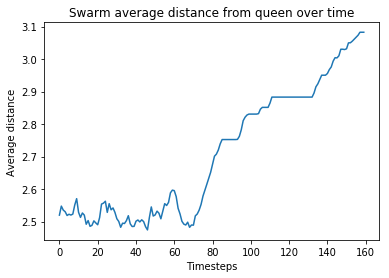

In [68]:
plt.plot(average_distances)
plt.xlabel('Timesteps')
plt.ylabel('Average distance')
plt.title('Swarm average distance from queen over time')
plt.show()

### II. 2D phase diagram showing the plateau values of swarms

In [111]:
queen_concentration = [0.01, 0.255, 0.5]
worker_concentration = [0.005, 0.2525, 0.5]
swarm_end_distance = np.random.random((3, 3))

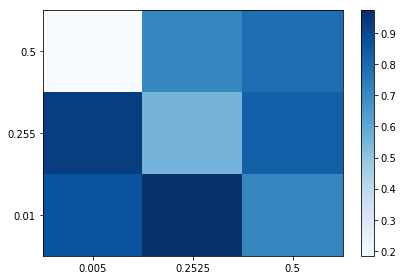

In [112]:
fig, ax = plt.subplots()
#im = ax.imshow(swarm_end_distance)

# We want to show all ticks...
ax.set_xticks(np.arange(len(worker_concentration)))
ax.set_yticks(np.arange(len(queen_concentration)))
# ... and label them with the respective list entries
ax.set_xticklabels(worker_concentration)
ax.set_yticklabels(queen_concentration)

heatmap = ax.pcolor(swarm_end_distance, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(swarm_end_distance.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(swarm_end_distance.shape[1])+0.5, minor=False)

fig.colorbar(heatmap)
fig.tight_layout()
plt.show()

### III. Distance between workers over time